In [1]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Descriptors/Train_2d_3d_all_descriptors.csv')

/tmp/ipykernel_3722683/4026518885.py:1: DtypeWarning: Columns (1275,1277,1280,1285,1292,1298,1304,1354,1356,1359,1364,1371,1377,1383,1579,1580,1581,1583,1584,1590,1595,1596,1597) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Descriptors/Train_2d_3d_all_descriptors.csv')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.337032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 627871
[LightGBM] [Info] Number of data points in the train set: 5568, number of used features: 2842
[LightGBM] [Info] Start training from score -5.742906


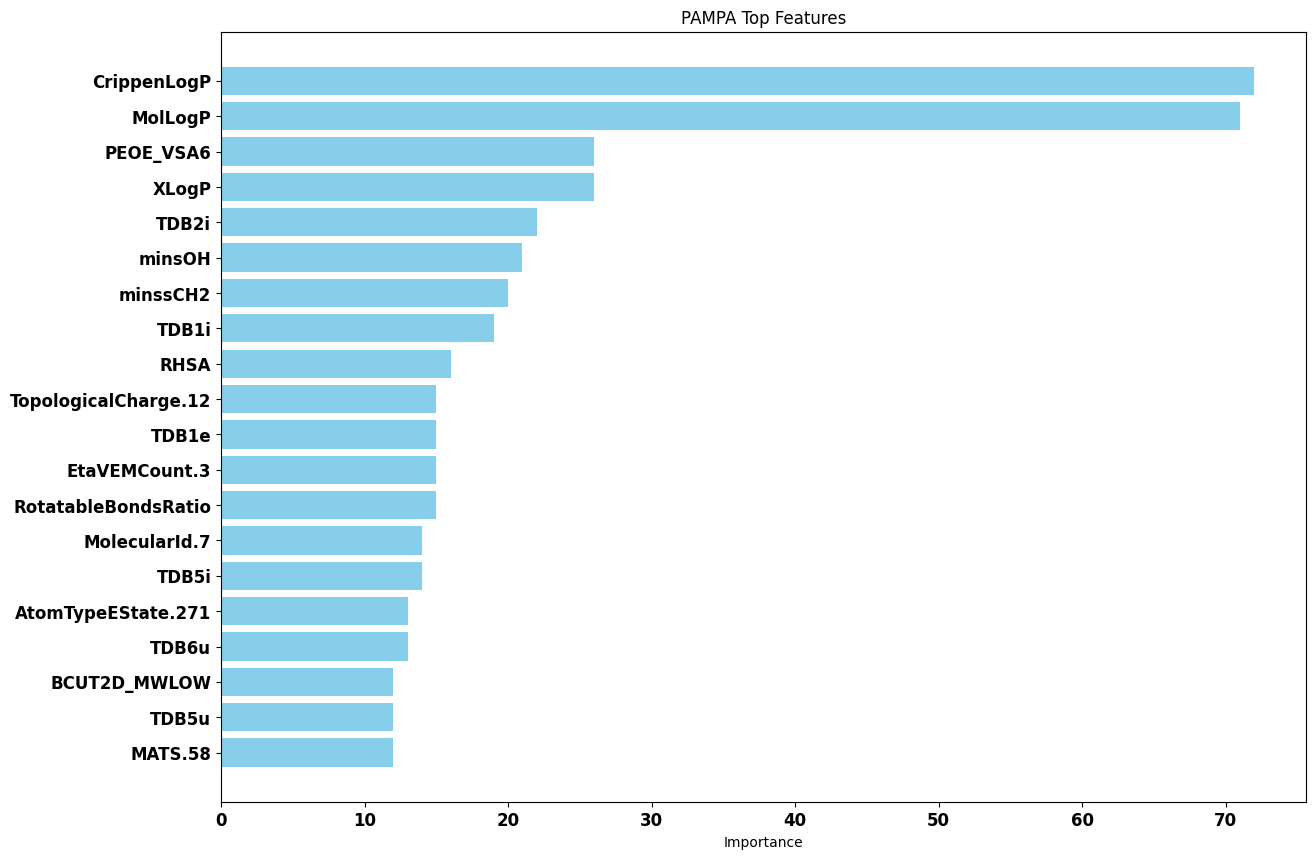

In [3]:
X_train = df1.drop(columns=['ID', 'SMILES', 'Permeability'])
X_train = X_train.select_dtypes(include=['number'])
y_train = df1['Permeability']

lgb_model = lgb.LGBMRegressor(objective='regression',metric='rmse',boosting_type='gbdt',num_leaves=31,learning_rate=0.05,random_state=101)
lgb_model.fit(X_train, y_train)

lgb_importance_all = lgb_model.feature_importances_
lgb_feature_importance_df_all = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_importance_all})
lgb_top_features_all = lgb_feature_importance_df_all.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(14, 10))
plt.barh(lgb_top_features_all['Feature'], lgb_top_features_all['Importance'], color='skyblue')

plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.xlabel('Importance')
plt.title('PAMPA Top Features')
plt.gca().invert_yaxis()
save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/imp_features_plot_.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()

In [4]:
lgb_feature_importance_df_all.to_csv('/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/Important_desc_all.csv')

In [5]:
print("Top 20 Features - LGBMRegressor:")
print(lgb_top_features_all)

Top 20 Features - LGBMRegressor:
                   Feature  Importance
2292           CrippenLogP          72
130                MolLogP          71
57               PEOE_VSA6          26
3085                 XLogP          26
3149                 TDB2i          22
2610                minsOH          21
2585              minssCH2          20
3148                 TDB1i          19
3205                  RHSA          16
1599  TopologicalCharge.12          15
3128                 TDB1e          15
1265         EtaVEMCount.3          15
1582   RotatableBondsRatio          15
1415         MolecularId.7          14
3152                 TDB5i          14
1255    AtomTypeEState.271          13
3103                 TDB6u          13
19            BCUT2D_MWLOW          12
3102                 TDB5u          12
722                MATS.58          12


In [6]:
df1_test = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Descriptors/Test_2d_3d_all_descriptors.csv')

/tmp/ipykernel_3722683/347469562.py:1: DtypeWarning: Columns (1275,1277,1292,1298,1354,1356,1371,1377,1579,1580,1581,1583,1584,1595,1596,1597) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_test = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Descriptors/Test_2d_3d_all_descriptors.csv')


In [7]:
def top_features(df1, top_features):
   
    common_cols = ['ID', 'SMILES', 'Permeability']
    df = df1[common_cols + [col for col in top_features if col in df1.columns]]
    
    return df

In [8]:
df_train_all = top_features(df1, lgb_top_features_all['Feature'].tolist())
df_train_all.head(10)

,ID,SMILES,Permeability,CrippenLogP,MolLogP,PEOE_VSA6,XLogP,TDB2i,minsOH,minssCH2,...,TDB1e,EtaVEMCount.3,RotatableBondsRatio,MolecularId.7,TDB5i,AtomTypeEState.271,TDB6u,BCUT2D_MWLOW,TDB5u,MATS.58
0,915,CC[C@H](C)[C@H](NC(=O)[C@@H]1CC(=O)N[C@@H](Cc2...,-7.00,5.48340,5.4834,186.921996,11.490,343.770742,11.634439,-0.921018,...,9.731176,0.624016,0.198473,0.244556,743.142846,14.348513,5.356425,9.935395,4.523604,0.069117
1,888,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1cccc(Cl)c1)N(C)...,-7.00,6.83100,6.8310,183.789212,10.250,0.000000,11.568900,-0.917417,...,0.000000,0.630081,0.232558,0.237439,0.000000,14.245499,0.000000,9.949304,0.000000,0.070188
2,593,C/N=C(\NC)NCCC[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C...,-7.00,5.08349,5.1858,190.564713,10.960,344.881936,0.000000,-0.861433,...,9.733695,0.630000,0.207692,0.278572,748.441954,13.934994,5.344586,9.957360,4.572194,0.085742
3,916,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H]1CC(=...,-7.00,4.85040,4.8504,164.016813,9.243,344.425873,11.446968,-0.795571,...,9.723679,0.626016,0.190476,0.253144,744.606741,14.237154,5.356053,9.948088,4.524116,0.057635
4,900,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)N(C)C(=O...,-7.00,5.81210,5.8121,184.285109,10.212,344.298825,11.538240,-0.873111,...,9.696701,0.623984,0.246032,0.253792,742.805458,14.166162,5.327087,9.936220,4.504869,0.102875
5,911,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1cc...,-6.96,4.51510,4.5151,173.903013,7.516,345.166826,11.318437,-0.930435,...,9.780769,0.630165,0.192000,0.256961,743.528217,14.129238,5.358048,9.947480,4.515355,0.077796
6,589,CC(C)C[C@@H]1NC(=O)[C@H](CCCCN(C)C)NC(=O)[C@H]...,-5.89,6.34270,6.3427,190.564713,11.133,343.584988,0.000000,-0.844363,...,9.700576,0.626016,0.218750,0.252681,750.997652,13.919671,5.329368,9.957323,4.585619,0.093732
7,912,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H...,-7.00,5.09710,5.0971,163.839473,9.655,344.992979,11.402983,-0.889778,...,9.773261,0.627083,0.203252,0.258964,750.432113,14.289732,5.399915,9.944220,4.545757,0.084629
8,898,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)N(C)C(=O)[C...,-6.96,4.85110,4.8511,157.418652,9.169,345.623810,11.509698,-0.933855,...,9.793087,0.631250,0.217742,0.260121,745.499940,14.038139,5.299148,9.947464,4.526383,0.082528
9,595,CC(C)C[C@@H]1NC(=O)[C@H](Cc2cccnc2)NC(=O)[C@H]...,-7.00,6.24850,6.2485,196.631080,9.966,342.894802,0.000000,-0.863081,...,9.742471,0.628049,0.193798,0.252900,750.554806,13.920003,5.372377,9.957273,4.597986,0.088846


In [9]:
df_test_all = top_features(df1_test, lgb_top_features_all['Feature'].tolist())
df_test_all.head(10)

,ID,SMILES,Permeability,CrippenLogP,MolLogP,PEOE_VSA6,XLogP,TDB2i,minsOH,minssCH2,...,TDB1e,EtaVEMCount.3,RotatableBondsRatio,MolecularId.7,TDB5i,AtomTypeEState.271,TDB6u,BCUT2D_MWLOW,TDB5u,MATS.58
0,908,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...,-7.00,6.3199,6.3199,200.592130,10.264,343.842461,11.363584,-0.932382,...,9.760637,0.625000,0.223077,0.247157,741.703503,14.317002,5.320964,9.936577,4.499937,0.090489
1,923,CC[C@H](C)[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H](...,-7.00,4.9450,4.9450,156.590160,9.667,345.094845,11.570545,-0.836449,...,9.737931,0.628049,0.174603,0.253686,749.445153,14.503461,5.372658,9.955648,4.540203,0.071442
2,897,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...,-7.00,4.5441,4.5441,200.769470,9.469,0.000000,11.254097,-0.945263,...,0.000000,0.625000,0.230159,0.254236,0.000000,14.064672,0.000000,9.947726,0.000000,0.094145
3,587,CC(C)C[C@@H]1NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)[C@...,-6.74,5.0947,5.5766,190.564713,10.338,343.901432,0.000000,-0.864915,...,9.760439,0.633197,0.195312,0.271278,749.815542,13.905801,5.370613,9.957371,4.587914,0.082272
4,921,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...,-5.54,3.1222,3.1222,150.169339,9.346,345.736860,10.767921,-1.062878,...,9.747457,0.630252,0.155738,0.261996,740.831408,14.331223,5.348828,9.938433,4.495079,0.090497
5,218,CC(C)C[C@H]1C(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H...,-6.80,5.3805,5.3805,176.717239,8.616,344.617156,11.682911,-0.901415,...,9.743965,0.631250,0.192000,0.244125,745.780547,13.898692,5.366903,9.964686,4.551704,0.090364
6,297,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...,-6.62,5.0383,5.0383,183.138061,8.692,344.379711,11.470355,-0.944930,...,9.752956,0.630252,0.193548,0.245304,747.662577,13.859939,5.351460,9.950488,4.556237,0.089427
7,899,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...,-6.33,4.5863,4.5863,143.889734,9.720,0.000000,11.159704,-0.739145,...,0.000000,0.626087,0.247863,0.271479,0.000000,14.024691,0.000000,9.940193,0.000000,0.087220
8,588,CC(C)C[C@@H]1NC(=O)[C@H](CCCCN(C)C)NC(=O)[C@@H...,-5.96,4.2378,4.2378,146.385404,8.532,345.376216,0.000000,-0.828332,...,9.748094,0.634783,0.200000,0.270585,741.598059,13.839443,5.323781,9.959669,4.530334,0.085058
9,514,CC(C)C[C@H]1C(=O)N[C@@H]([C@@H](C)O)C(=O)N(C)[...,-6.70,3.5274,3.5274,176.717239,7.104,344.815751,11.463357,-0.903421,...,9.785448,0.632609,0.183333,0.252921,751.142271,13.825865,5.376791,9.968256,4.582096,0.080724


In [10]:
def add_label_column(df):
    df = df.copy()
    df['Label'] = (df['Permeability'] >= -6).astype(int)
    return df

In [11]:
train_df_labeled = add_label_column(df_train_all)
test_df_labeled = add_label_column(df_test_all)
print(train_df_labeled.head(10))
print(test_df_labeled.head(10))

    ID                                             SMILES  Permeability  \
0  915  CC[C@H](C)[C@H](NC(=O)[C@@H]1CC(=O)N[C@@H](Cc2...         -7.00   
1  888  CC[C@H](C)[C@H](NC(=O)[C@H](Cc1cccc(Cl)c1)N(C)...         -7.00   
2  593  C/N=C(\NC)NCCC[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C...         -7.00   
3  916  CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H]1CC(=...         -7.00   
4  900  CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)N(C)C(=O...         -7.00   
5  911  CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1cc...         -6.96   
6  589  CC(C)C[C@@H]1NC(=O)[C@H](CCCCN(C)C)NC(=O)[C@H]...         -5.89   
7  912  CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H...         -7.00   
8  898  CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)N(C)C(=O)[C...         -6.96   
9  595  CC(C)C[C@@H]1NC(=O)[C@H](Cc2cccnc2)NC(=O)[C@H]...         -7.00   

   CrippenLogP  MolLogP   PEOE_VSA6   XLogP       TDB2i     minsOH  minssCH2  \
0      5.48340   5.4834  186.921996  11.490  343.770742  11.634439 -0.921018   
1      6.83100

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

In [13]:
def boxplots_diff_labels(df, features, label_col='Label', save_path='feature_box_plot.png'):
    num_features = len(features)
    cols = 5  
    rows = (num_features + cols - 1) // cols  

    plt.figure(figsize=(cols * 8, rows * 7))
    sns.set_style("whitegrid")

    label_mapping = {0: "Non-Permeable", 1: "Permeable"}

    for idx, feature in enumerate(features, 1):
        plt.subplot(rows, cols, idx)
        ax = sns.boxplot(x=label_col, y=feature, data=df, hue=label_col, palette="Set2", legend=False)

        plt.title(f'{feature}', fontsize=16, fontweight='600', pad=12)
        plt.xlabel("Permeability", fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.xticks(ticks=[0, 1], labels=[label_mapping[0], label_mapping[1]], fontsize=11)
        plt.yticks(fontsize=11)

    plt.tight_layout()
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()



def ttest_feature_tests(df, label_col='Label', feature_cols=None, save_path='ttest.csv'):
   
    
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    label_0_data = df[df[label_col] == 0]
    label_1_data = df[df[label_col] == 1]

    results = []
    alpha = 0.05 
    for feature in feature_cols:
        class0_vals = label_0_data[feature].dropna()
        class1_vals = label_1_data[feature].dropna()
        
        
        t_stat, p_val = stats.ttest_ind(class0_vals, class1_vals, equal_var=False)
        
        print(f"Feature: {feature}")
        print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")
        
        # Interpretation
        if p_val < alpha:
            print("Result: Reject the null hypothesis - significant difference between the two groups.\n")
        else:
            print("Result: Fail to reject the null hypothesis - no significant difference between the two groups.\n")
        
        results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_val})

    results_df = pd.DataFrame(results).sort_values('p-value')
    results_df.to_csv(save_path, index=False)
    return results_df



def plot_top_feature_correlations(df, label_col='Label', permeability_col='Permeability',
                                   top_desc_features=None, save_path='feature_correlation_plot.png'):
    

    features = top_desc_features + [permeability_col, label_col]
    df_sub = df[features]

    corr_label0 = df_sub[df_sub[label_col] == 0].corr()[permeability_col].drop([permeability_col, label_col])
    corr_label1 = df_sub[df_sub[label_col] == 1].corr()[permeability_col].drop([permeability_col, label_col])

    corr_df = pd.DataFrame({
        'Feature': corr_label0.index,
        'Corr_Label_0': corr_label0.values,
        'Corr_Label_1': corr_label1.reindex(corr_label0.index).values
    })

    print("\nTop Features Correlation with Permeability by Label:\n")
    print(corr_df.to_string(index=False))

    plt.style.use('default')
    sns.set_context('talk')
    plt.rcParams.update({
        'font.family': 'DejaVu Sans',
        'axes.titleweight': 'bold',
        'axes.labelweight': 'bold'
    })

    fig, ax = plt.subplots(figsize=(16, 14))

    bar_height = 0.35
    n_features = len(corr_df)
    y_indexes = np.arange(n_features)

    colors_label0 = ['red'] * n_features
    colors_label1 = ['blue'] * n_features

    ax.barh(y_indexes + bar_height/2, corr_df['Corr_Label_0'], height=bar_height,
            color=colors_label0, label='Non-Permeable peptides', align='center')

    ax.barh(y_indexes - bar_height/2, corr_df['Corr_Label_1'], height=bar_height,
            color=colors_label1, label='Permeable peptides', align='center')

    ax.set_yticks(y_indexes)
    ax.set_yticklabels(corr_df['Feature'], fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    ax.set_xlabel('Correlation with Permeability', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_title('Features Correlation with Permeability', fontsize=24, fontweight='bold', pad=25)

    ax.xaxis.grid(True, linestyle='--', linewidth=0.8, alpha=0.6)
    ax.yaxis.grid(False)
    ax.invert_yaxis()

    for spine in ['bottom', 'left', 'top', 'right']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(1)

    ax.tick_params(axis='both', which='major',
                   direction='out',
                   length=6,
                   width=1,
                   color='black',
                   labelsize=12)

    ax.legend(frameon=False, fontsize=16, loc='upper right', borderaxespad=0.5)

    plt.tight_layout()

  
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()

    return corr_df


In [14]:

feature_cols_train = [col for col in train_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

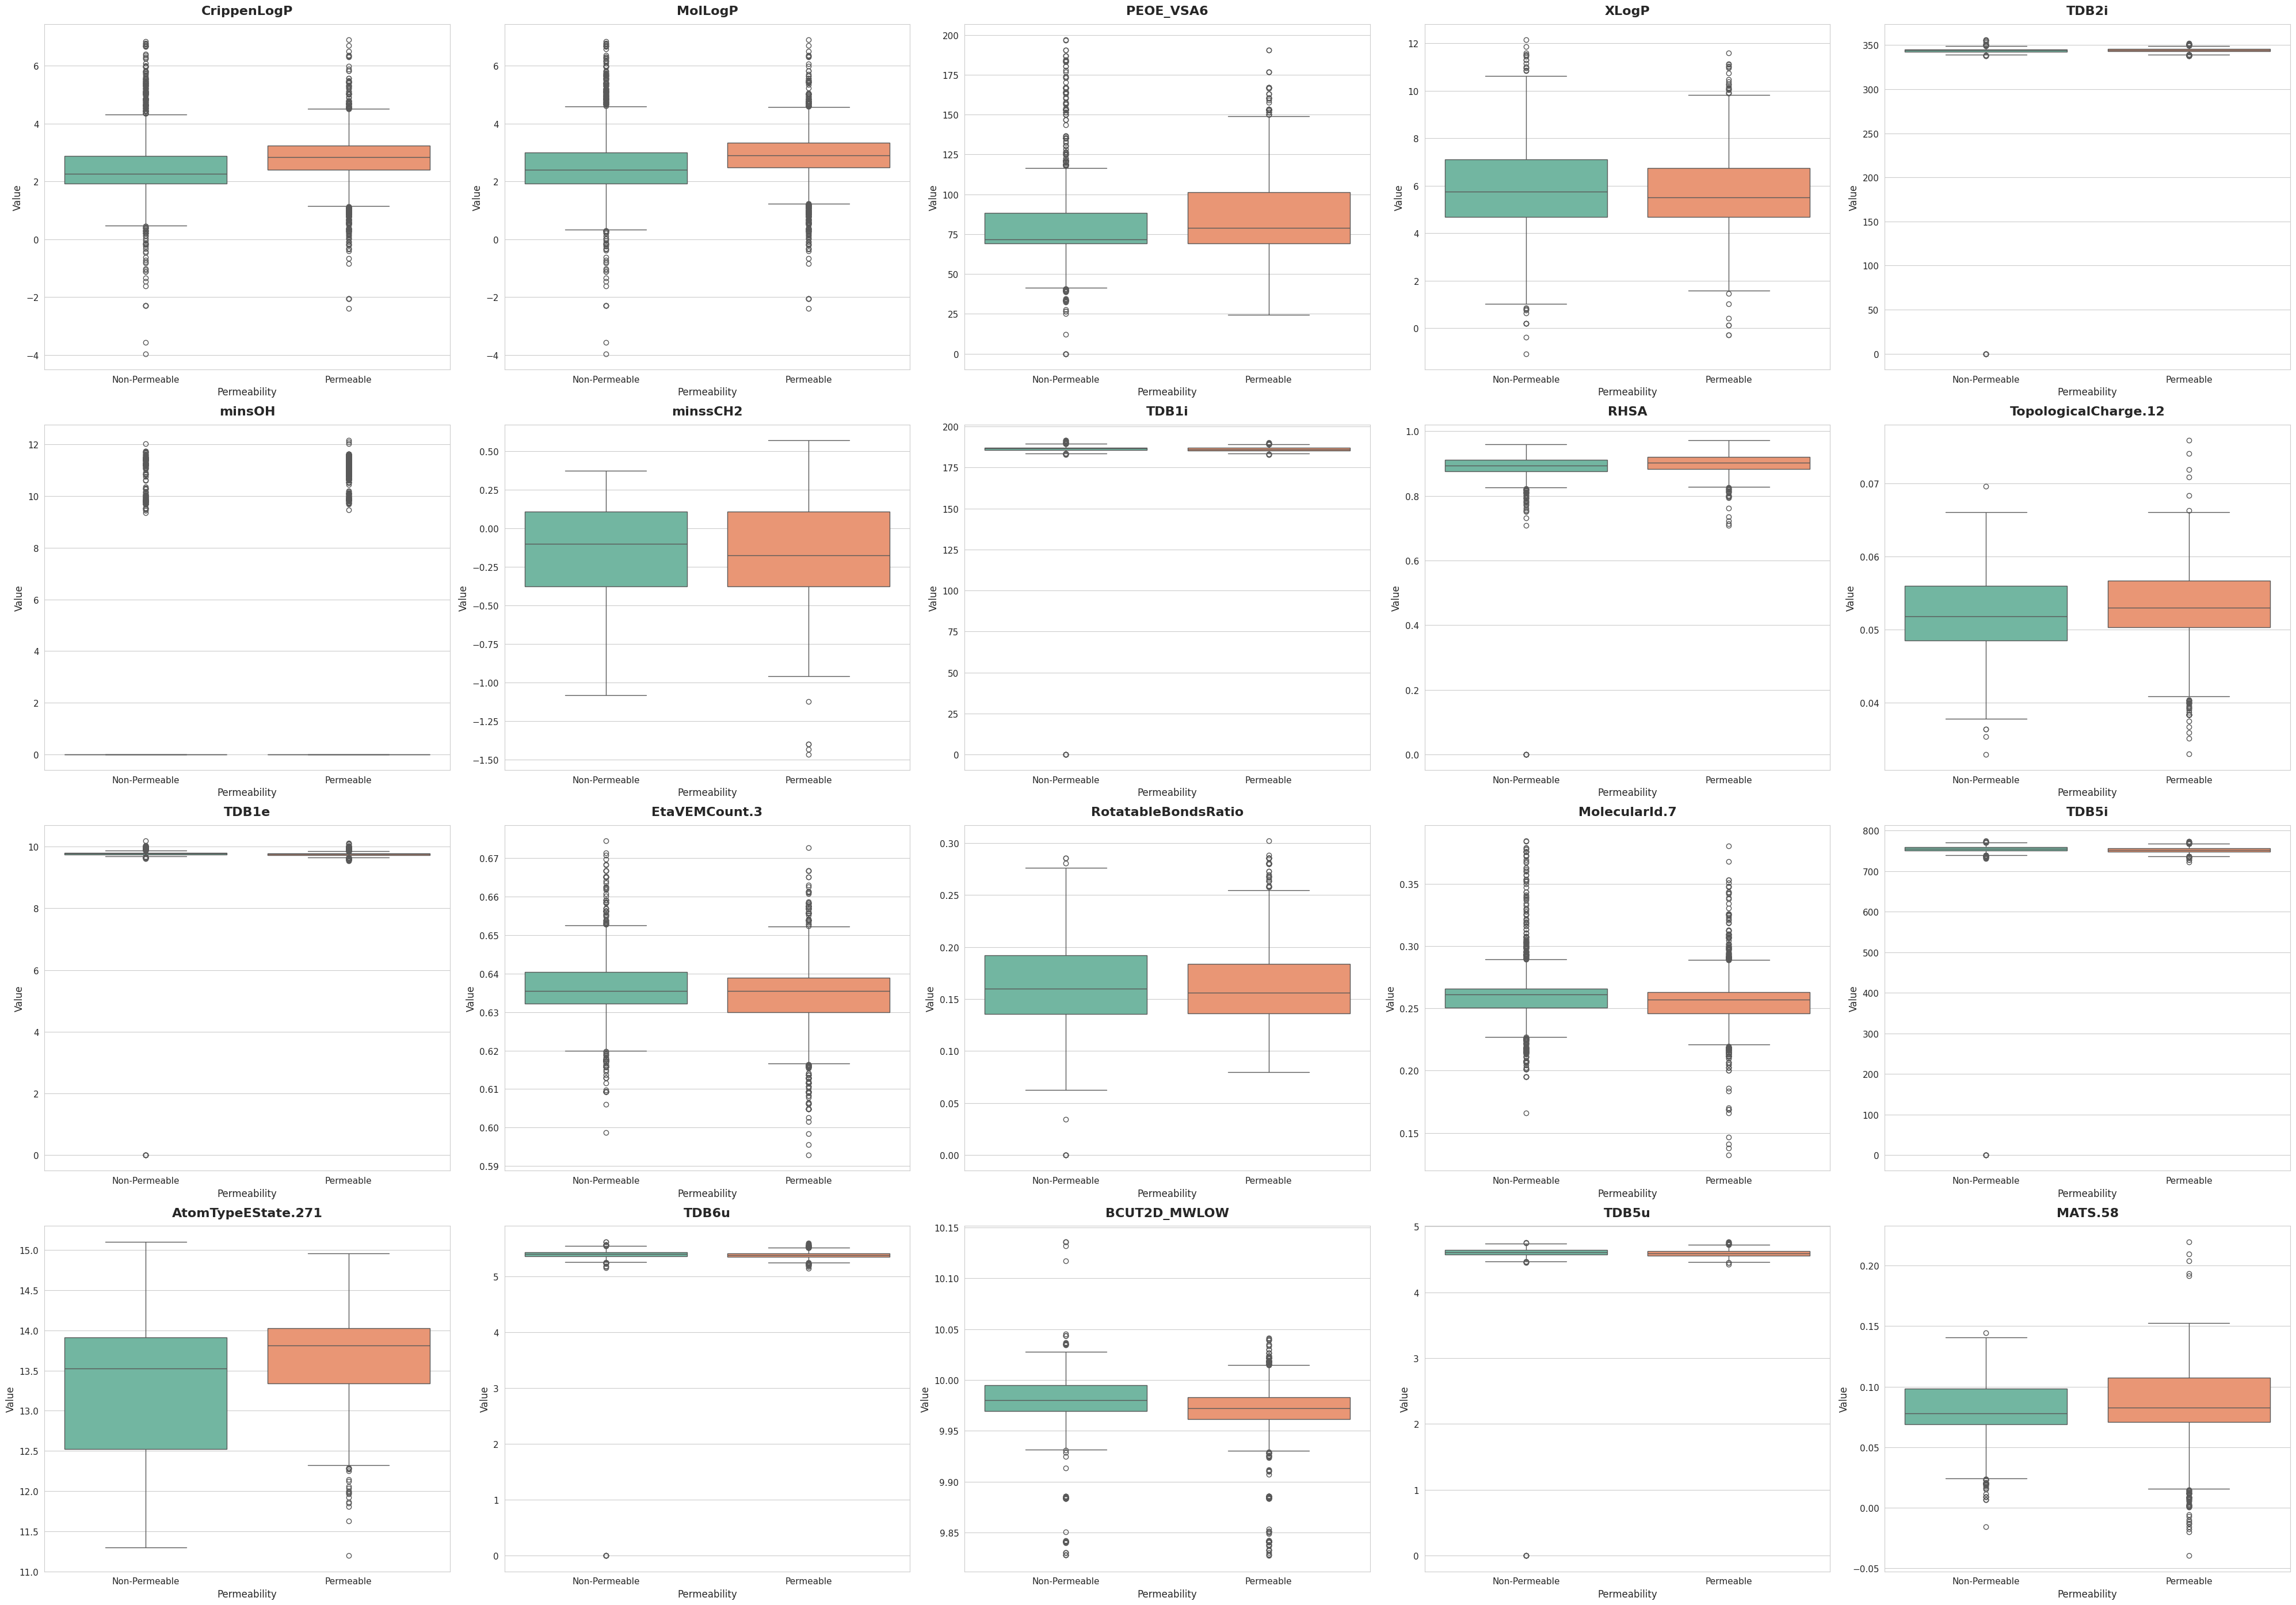

In [15]:
boxplots_diff_labels(train_df_labeled, feature_cols_train, label_col='Label', save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/desc_train_box_plot.png')


Top Features Correlation with Permeability by Label:

             Feature  Corr_Label_0  Corr_Label_1
         CrippenLogP      0.085587     -0.095437
             MolLogP      0.106728     -0.124471
           PEOE_VSA6      0.090373      0.176283
               XLogP      0.058224     -0.022754
               TDB2i      0.010859      0.251730
              minsOH     -0.142148      0.542553
            minssCH2      0.190871     -0.307291
               TDB1i      0.010028      0.088533
                RHSA      0.143004     -0.122492
TopologicalCharge.12     -0.083726      0.257074
               TDB1e      0.011143     -0.111371
       EtaVEMCount.3     -0.001217     -0.155095
 RotatableBondsRatio     -0.131443     -0.050975
       MolecularId.7     -0.114898      0.100148
               TDB5i      0.035625     -0.360940
  AtomTypeEState.271      0.084821      0.141855
               TDB6u      0.041690     -0.218693
        BCUT2D_MWLOW     -0.071982     -0.142828
              

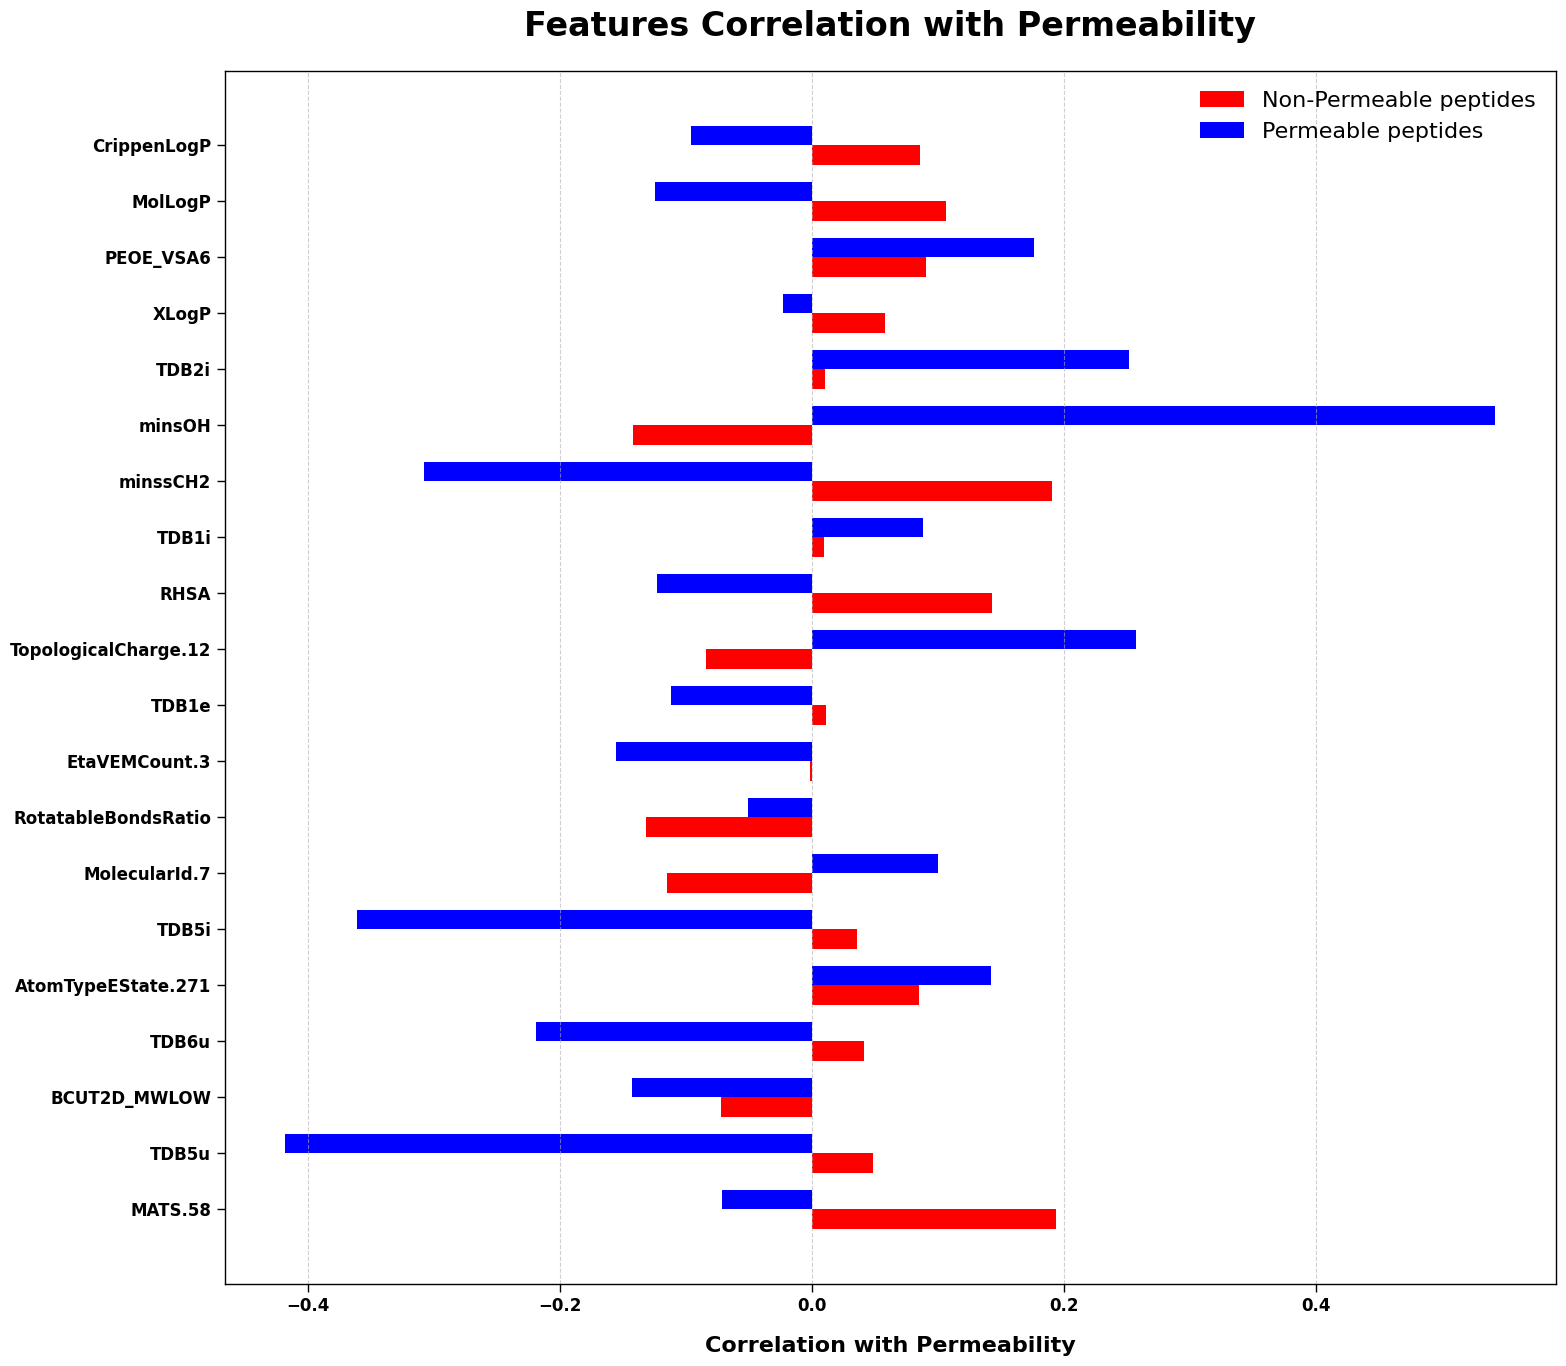

In [17]:
lgb_top_features_list = lgb_top_features_all['Feature'].to_list()
corr_df = plot_top_feature_correlations(
    train_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=lgb_top_features_list,
    save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/desc_train_corr_plot.png'
    
)

In [18]:
feature_cols_train

['CrippenLogP',
 'MolLogP',
 'PEOE_VSA6',
 'XLogP',
 'TDB2i',
 'minsOH',
 'minssCH2',
 'TDB1i',
 'RHSA',
 'TopologicalCharge.12',
 'TDB1e',
 'EtaVEMCount.3',
 'RotatableBondsRatio',
 'MolecularId.7',
 'TDB5i',
 'AtomTypeEState.271',
 'TDB6u',
 'BCUT2D_MWLOW',
 'TDB5u',
 'MATS.58']

In [19]:
ttest_df_train = ttest_feature_tests(train_df_labeled, label_col='Label', feature_cols=feature_cols_train, save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/pampa_train_ttest.csv')
print(ttest_df_train)

Feature: CrippenLogP
T-Statistic: -10.3371, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: MolLogP
T-Statistic: -10.0439, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: PEOE_VSA6
T-Statistic: -8.8101, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: XLogP
T-Statistic: 2.0782, P-Value: 0.0378
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: TDB2i
T-Statistic: -2.1661, P-Value: 0.0304
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: minsOH
T-Statistic: -11.2185, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: minssCH2
T-Statistic: 3.9087, P-Value: 0.0001
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: TDB1i
T-

In [20]:
feature_cols_test = [col for col in test_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

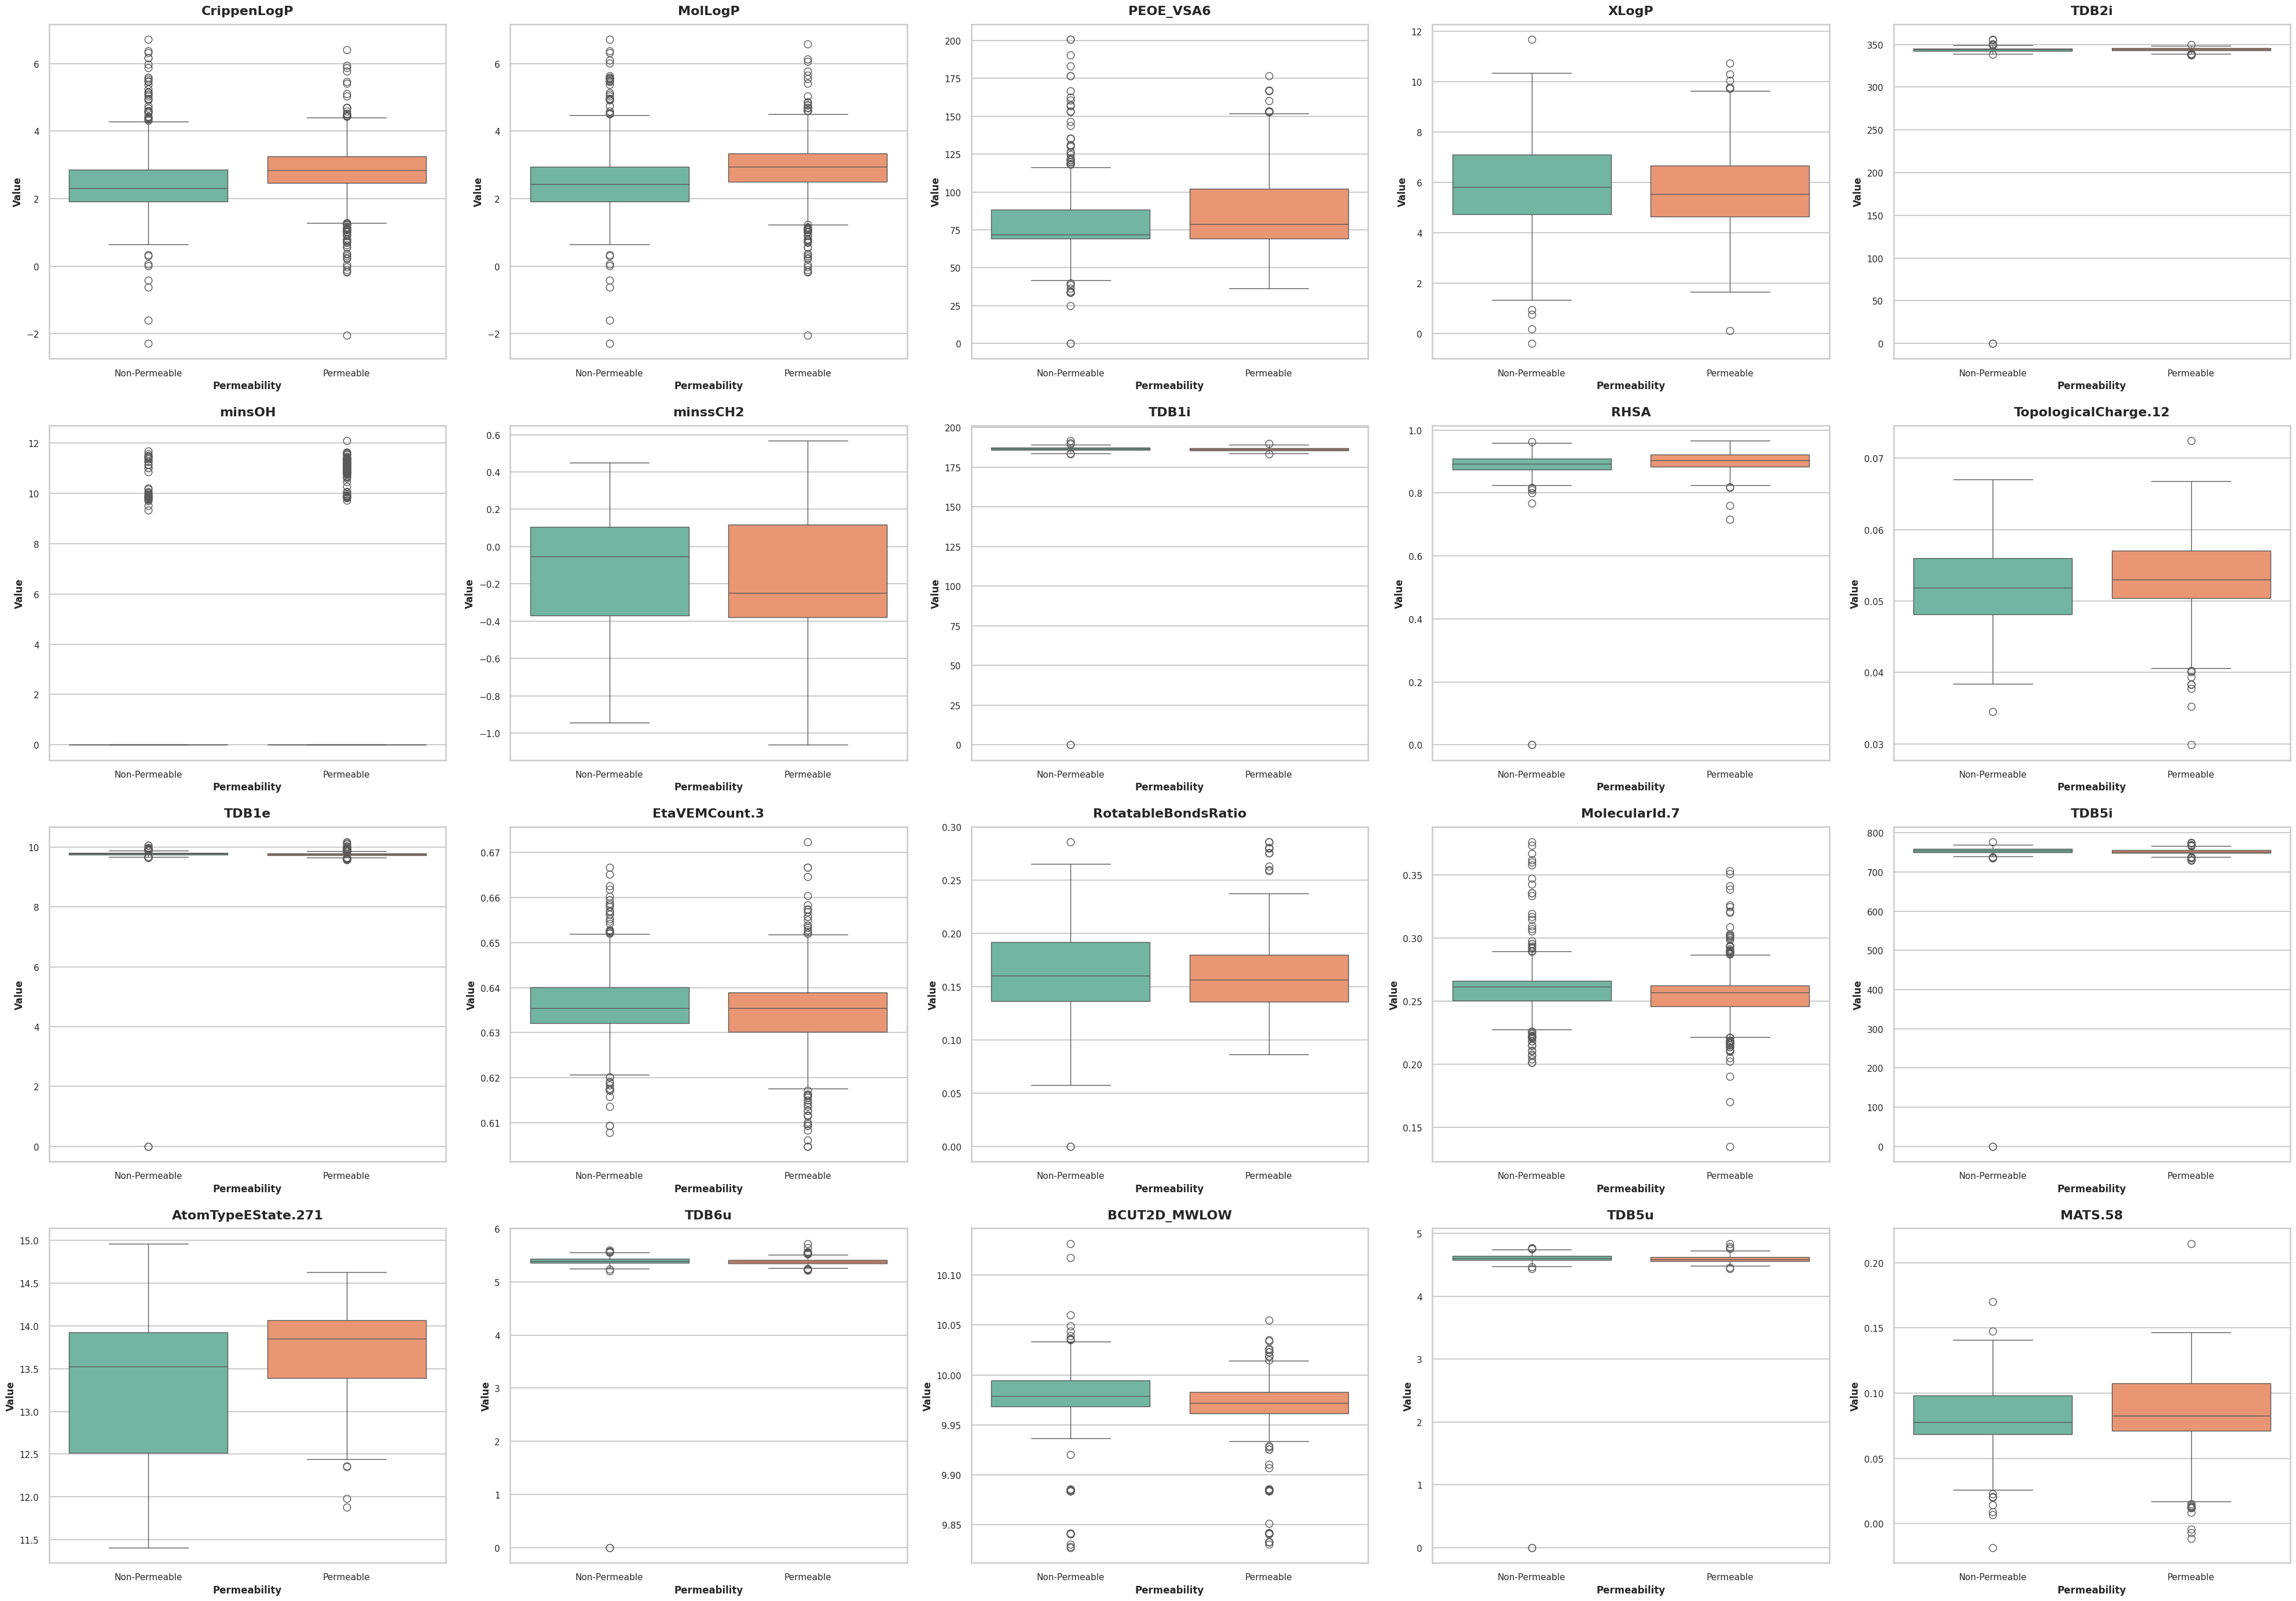

In [21]:
boxplots_diff_labels(test_df_labeled, feature_cols_test, label_col='Label', save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/desc_test_box_plot.png')


Top Features Correlation with Permeability by Label:

             Feature  Corr_Label_0  Corr_Label_1
         CrippenLogP     -0.017035     -0.092187
             MolLogP      0.015985     -0.134887
           PEOE_VSA6      0.078022      0.201910
               XLogP     -0.017687      0.008458
               TDB2i     -0.012266      0.226931
              minsOH     -0.074337      0.537473
            minssCH2      0.120753     -0.270277
               TDB1i     -0.012845      0.080567
                RHSA      0.066697     -0.144546
TopologicalCharge.12     -0.079372      0.270691
               TDB1e     -0.007499     -0.130820
       EtaVEMCount.3      0.072069     -0.189808
 RotatableBondsRatio     -0.178901     -0.022891
       MolecularId.7     -0.072047      0.092051
               TDB5i      0.000451     -0.351279
  AtomTypeEState.271      0.135375      0.147932
               TDB6u      0.001493     -0.179229
        BCUT2D_MWLOW     -0.047638     -0.161785
              

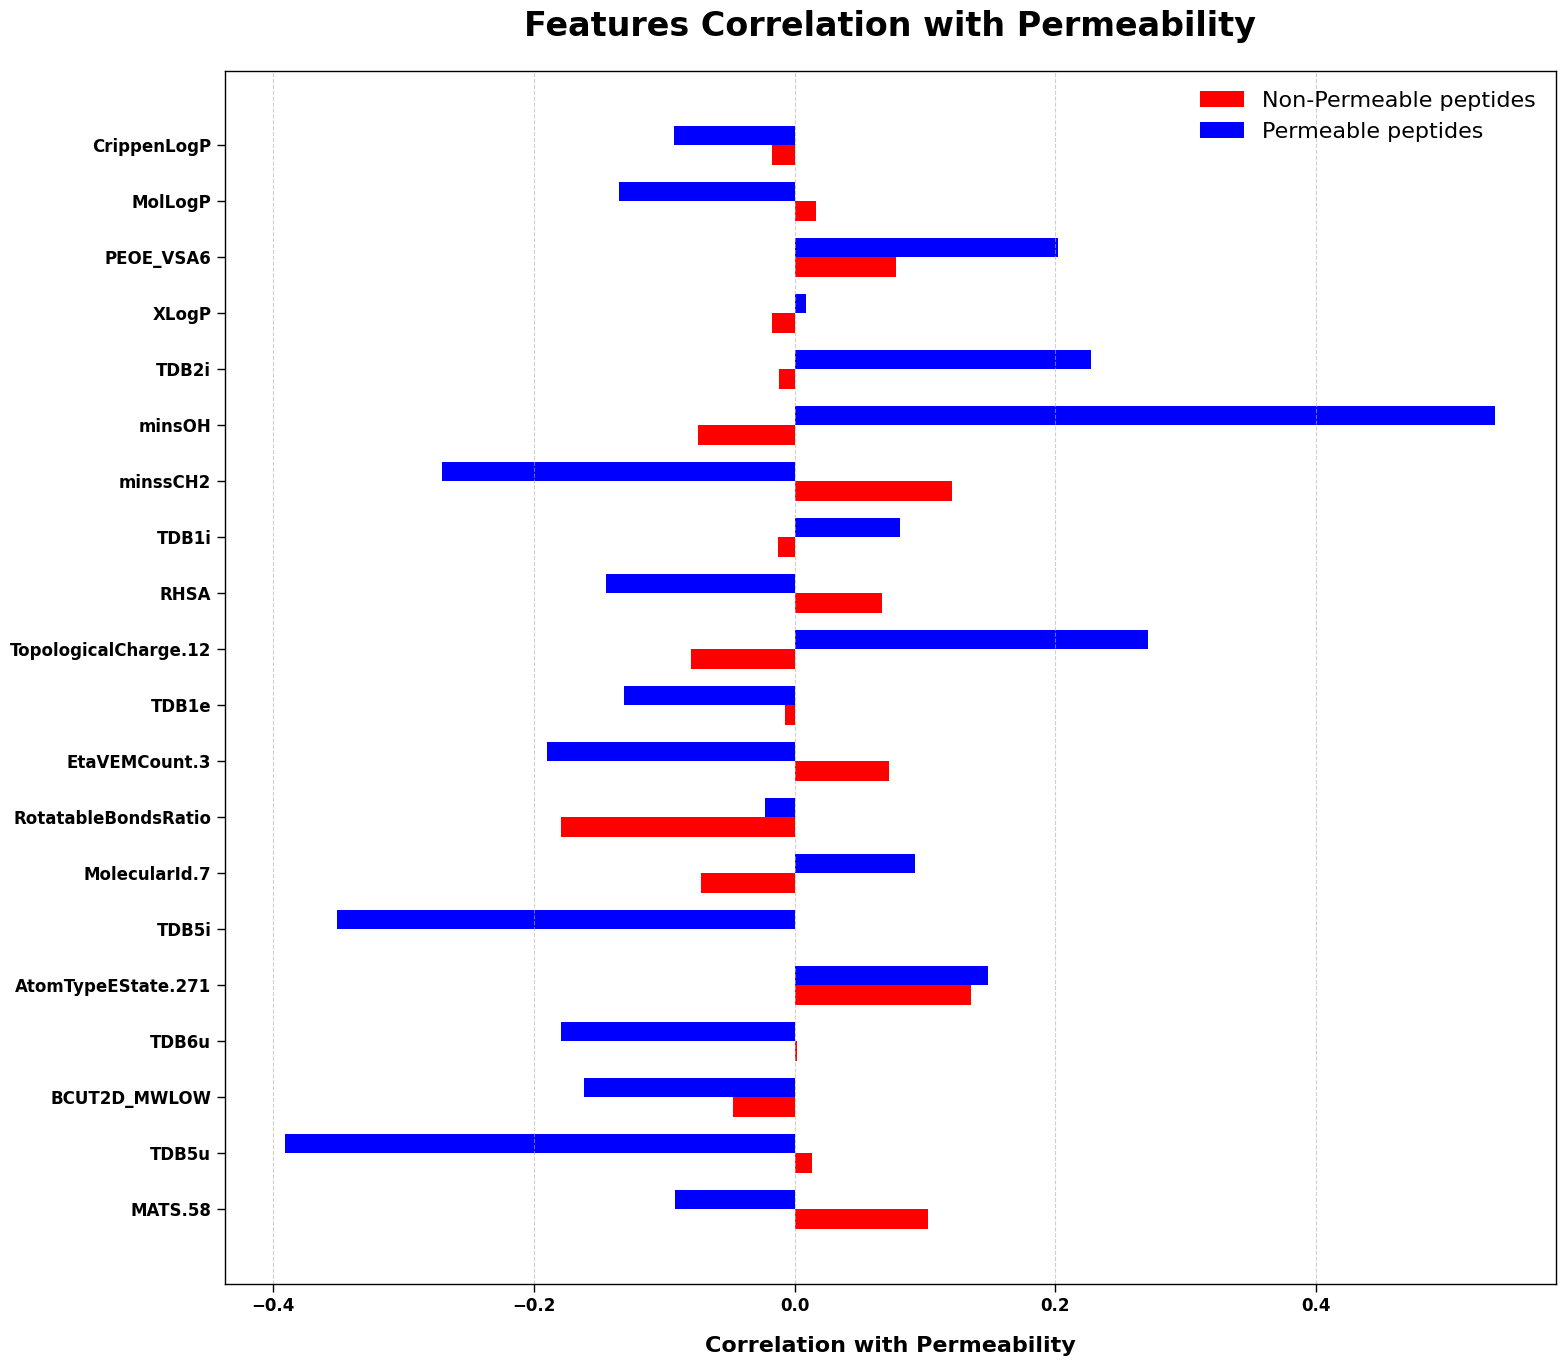

In [22]:
lgb_top_features_list = lgb_top_features_all['Feature'].to_list()

corr_df = plot_top_feature_correlations(
    test_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=lgb_top_features_list,
    save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/desc_test_corr_plot.png'
)

In [23]:
ttest_df_test = ttest_feature_tests(test_df_labeled, label_col='Label', feature_cols=feature_cols_test, save_path = '/home/users/akshay/PCPpred/PAMPA/Results/feature_analysis/pampa_ttest_test.csv')
print(ttest_df_test)

Feature: CrippenLogP
T-Statistic: -4.8721, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: MolLogP
T-Statistic: -5.1406, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: PEOE_VSA6
T-Statistic: -4.2103, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: XLogP
T-Statistic: 1.9392, P-Value: 0.0529
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: TDB2i
T-Statistic: -1.2698, P-Value: 0.2048
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: minsOH
T-Statistic: -6.1164, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: minssCH2
T-Statistic: 2.5593, P-Value: 0.0106
Result: Reject the null hypothesis - significant difference between the two groups.